<a href="https://colab.research.google.com/github/PreposterousTurtle/LearningPythonAI-ML/blob/main/Following_bikes_exampleyt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


#"Seoul Bike Sharing Demand," UCI Machine Learning Repository, 2020. [Online]. Available: https://doi.org/10.24432/C5F62R.


In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)


In [ ]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df =df[df["hour"]==12]
df = df.drop("hour", axis=1)
df.head()


,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


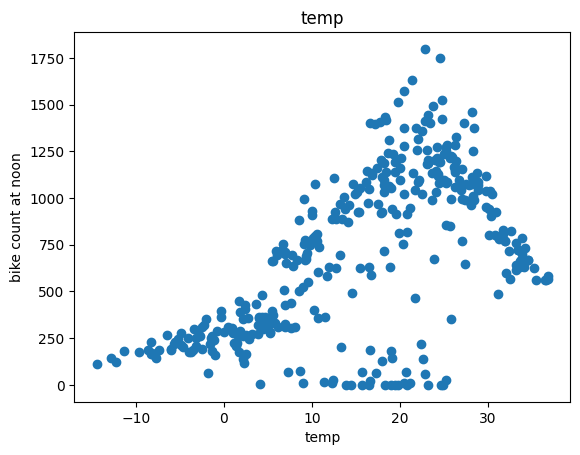

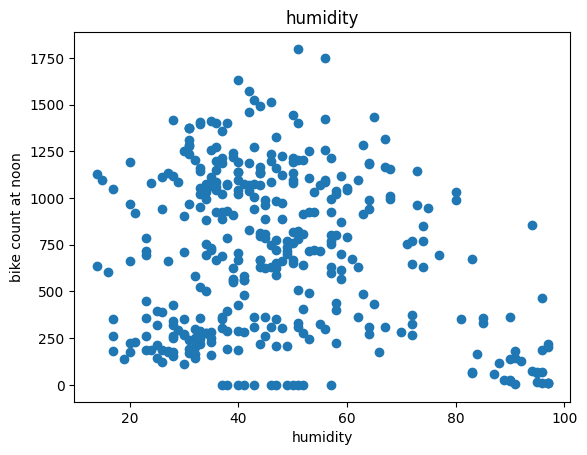

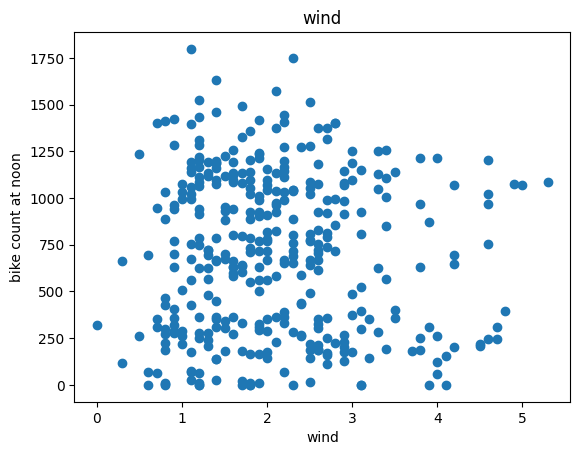

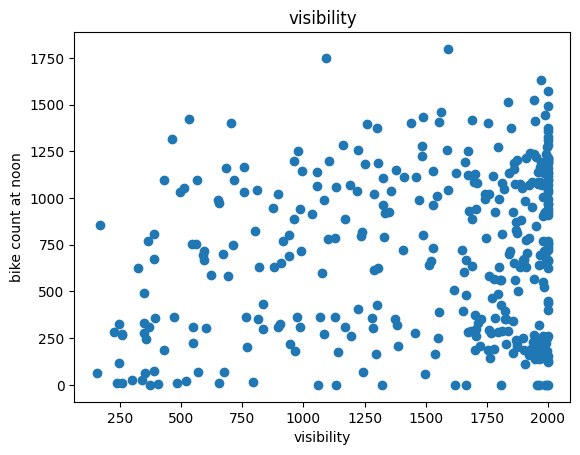

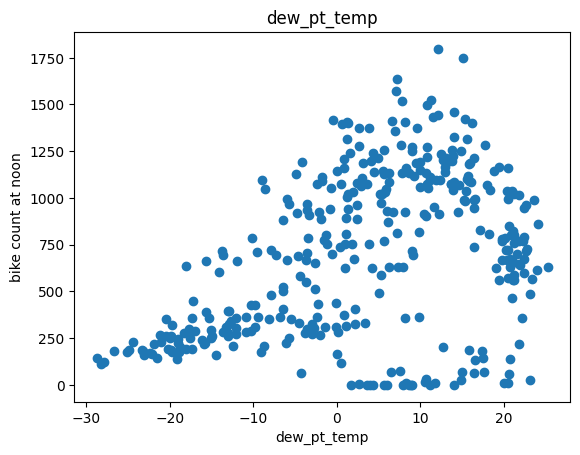

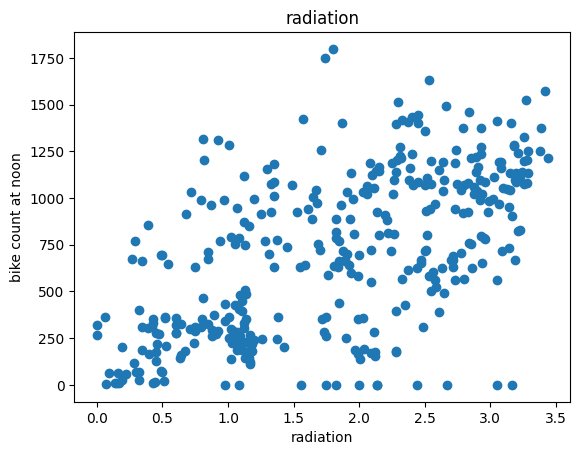

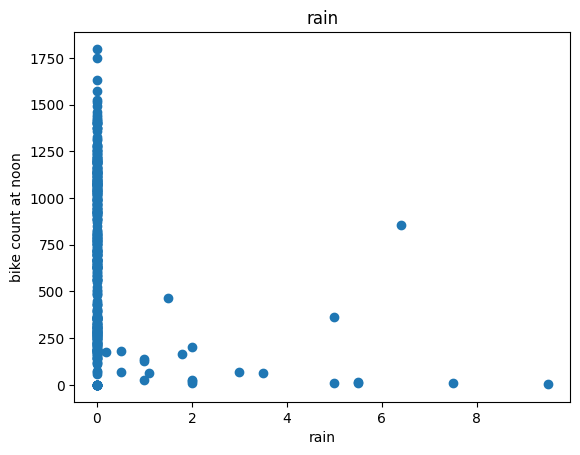

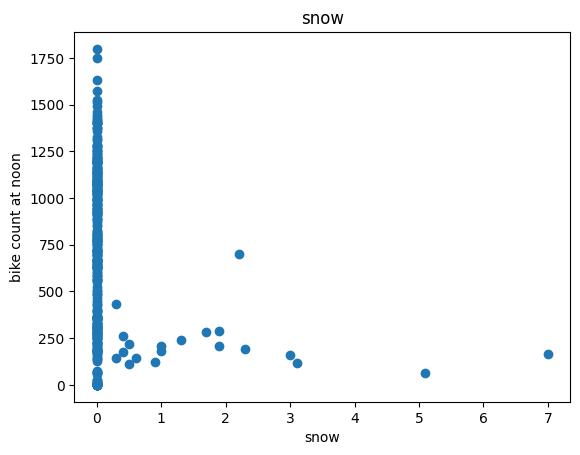

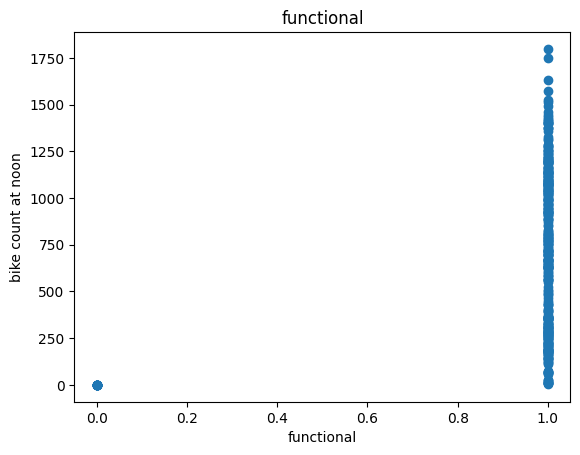

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike count at noon")
  plt.xlabel(label)
  plt.show()


In [ ]:
#Drop the data that isn't roughly linear
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Split up the dataset

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data= np.hstack((x, y))
  return data, x, y


In [ ]:
_, x_train, y_train = get_xy(train, "bike_count", x_labels=["temp"])
_, x_val, y_val = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.52133041]] [378.9804308]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.3481537324461601

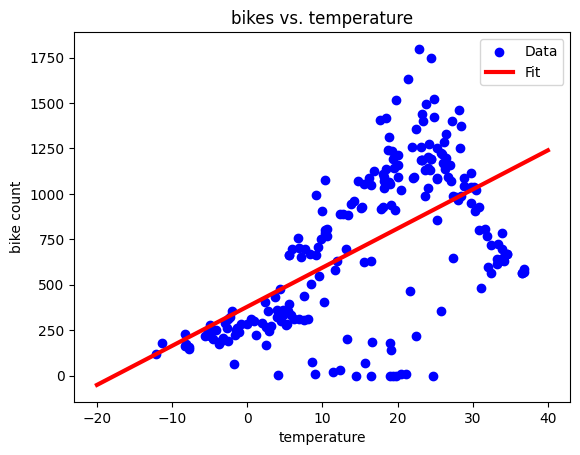

In [ ]:
plt.scatter(x_train, y_train, label = "Data", color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red", linewidth=3)
plt.legend()
plt.title("bikes vs. temperature")
plt.ylabel("bike count")
plt.xlabel("temperature")

plt.show()

#Multiple Linear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.5105119619089835

#Regression with Neural Network

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train.reshape(-1))
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    x_train.reshape(-1),
    y_train,
    verbose =0,
    epochs=1000,
    validation_data=(x_val, y_val)
    )

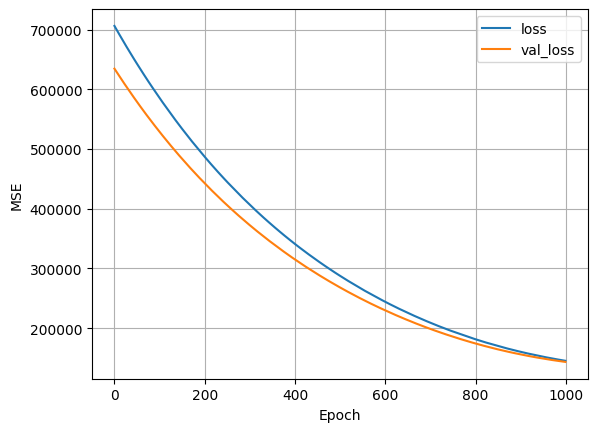

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


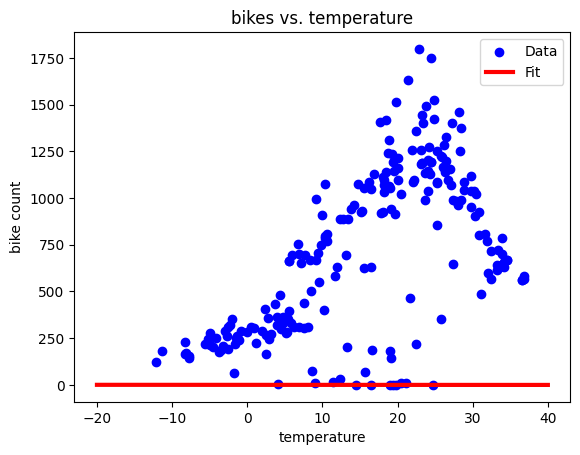

In [ ]:
plt.scatter(x_train, y_train, label = "Data", color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red", linewidth=3)
plt.legend()
plt.title("bikes vs. temperature")
plt.ylabel("bike count")
plt.xlabel("temperature")

plt.show()
#graph looks funny because the history wasn't saved

#Neural Net



In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train.reshape(-1))
nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    x_train,
    y_train,
    verbose =0,
    epochs=100,
    validation_data=(x_val, y_val)
    )

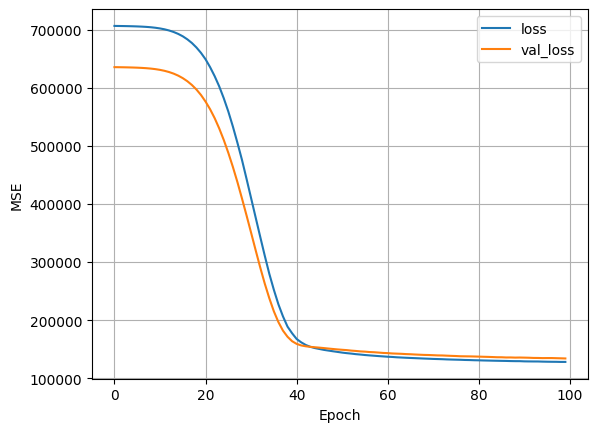

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


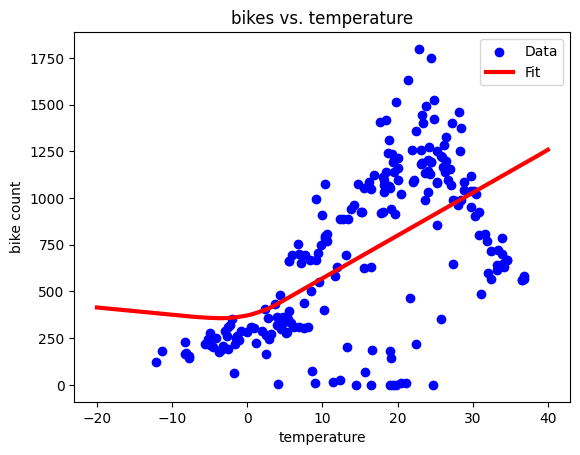

In [ ]:
plt.scatter(x_train, y_train, label = "Data", color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red", linewidth=3)
plt.legend()
plt.title("bikes vs. temperature")
plt.ylabel("bike count")
plt.xlabel("temperature")

plt.show()
#graph looks funny because the history wasn't saved

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_train_all)
nn_model = tf.keras.Sequential([
  all_normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    x_train_all,
    y_train_all,
    validation_data=(x_val_all, y_val_all),
    verbose =0,
    epochs=100,
    )

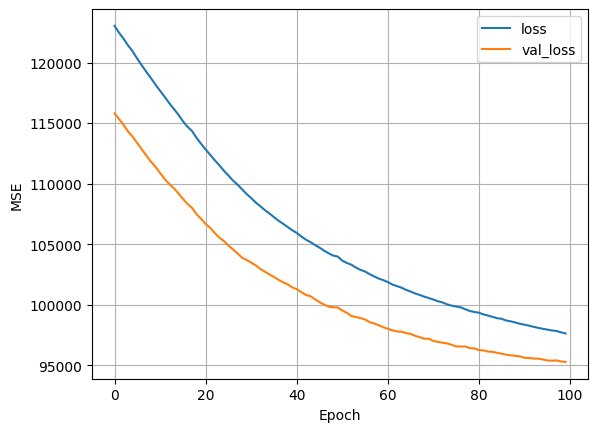

In [ ]:
plot_loss(history)

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.5105119619089835

In [ ]:
y_pred_lr = all_reg.predict(x_test_all)

In [ ]:
y_pred_nn = nn_model.predict(x_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
def MSE( y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

np.float64(89549.34549808287)

In [ ]:
MSE(y_pred_nn, y_test_all)

np.float64(88698.21548953523)

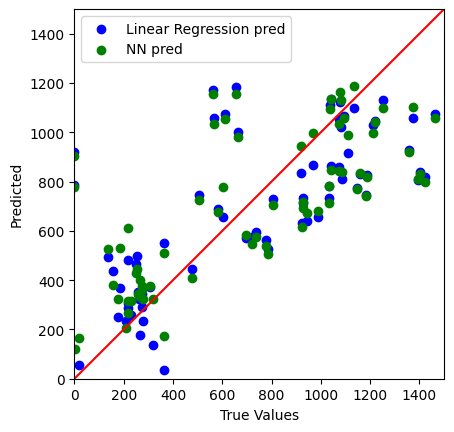

In [ ]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lr, label = "Linear Regression pred", color = "blue")

plt.scatter(y_test_all, y_pred_nn, label = "NN pred", color = "green")
lims = [0,1500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")
plt.xlabel("True Values")
plt.ylabel("Predicted")
plt.legend()
plt.show()